# Introduction

* The purpose of this project is to build a model with the best maximum F1 score (threshold=.59). This project will involve testing different types of models with different combinations of hyperparameters in order to achieve this goal. Finally, the auc_roc score for the best model will be determined at the end of this project. 
* Two methods (Upsampling and Downsampling) will be used in order to account for an imbalance in the classes. 

In [1]:
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('/datasets/Churn.csv')

In [3]:
data.shape

(10000, 14)

In [4]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [5]:
data.isna().sum()
data.dropna(inplace=True)

In [6]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
label_encoder = preprocessing.LabelEncoder()
data['Gender']= label_encoder.fit_transform(data['Gender'])
data["Surname"]=label_encoder.fit_transform(data["Surname"])
data["Geography"]=label_encoder.fit_transform(data["Geography"])

In [8]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1063,619,0,0,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,1120,608,2,0,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,1933,502,0,0,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,270,699,0,0,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,1721,850,2,0,43,2.0,125510.82,1,1,1,79084.10,0


#For the Gender column: Female=0 Male=1. All columns are numeric except Geography and Surname.

In [9]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname              int64
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
target=data["Exited"]
features=data.drop(["Exited"], axis=1)

In [12]:
target.shape

(9091,)

In [13]:
features.shape

(9091, 13)

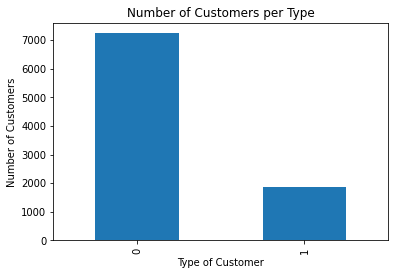

In [14]:
target.value_counts().plot(kind="bar")
plt.title("Number of Customers per Type")
plt.xlabel("Type of Customer")
plt.ylabel("Number of Customers")
plt.show()

* Here, the classes are quite imbalanced, many more customers that have not left ("0") versus who have exited (1). 

In [15]:
df_train, df_valid = train_test_split(data, test_size=0.20, random_state=12345)
df_train, df_test=train_test_split(df_train, test_size=0.20, random_state=12345)
features_train = df_train.drop(["Exited"], axis=1)
target_train = df_train['Exited']
features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']
features_test=df_test.drop(["Exited"], axis=1)
target_test=df_test['Exited']

In [16]:
numeric= ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler=StandardScaler()
scaler.fit(features_train)
features_valid=scaler.transform(features_valid)
print(features_train.shape)
print(features_valid.shape)

(5817, 13)
(1819, 13)


In [17]:
scaler=StandardScaler()
scaler.fit(features_test)
print(features_test.shape)

(1455, 13)


* Above, all features that contain numeric columns are transformed to account for the variations in units accross features.

* Below, I will begin trying out different models without taking into account the imbalance and evaluate the result F1 scores.

# F1 Scores Without Imbalance Fixing

In [18]:
model = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
predictions_test=model.predict(features_test)
print('F1:', f1_score(target_test, predictions_test))


F1: 0.490566037735849


In [19]:
model = RandomForestClassifier(random_state=12345) 
model.fit(features_train, target_train) # train model on training set
predictions_valid = model.predict(features_valid)
predictions_test=model.predict(features_test)
result = f1_score(target_test, predictions_test)

In [20]:
result

0.5342789598108748

In [21]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
predictions_test=model.predict(features_test)
fone=f1_score(target_test, predictions_test)
print(fone)

0.4720720720720721


* The Decision Tree model resulted in an f1 score that was similar to the f1 score produced by the Logistic Regression model. So far, before taking into account the imbalance, the Random forest appears to produce the best F1 score.
* I will now balance the classes, then try the same models again after finding the best hyperparameters. The two different techniques that I will use to balance the classes are (1) Upsampling and (2) Downsampling methods.

* First, I will try upsampling/downsampling in the Logistic Regression model

# Upsampling Method

In [22]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [23]:
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)

In [24]:
target_upsampled.value_counts()

1    12030
0     4614
Name: Exited, dtype: int64

# Downsampling Method

In [25]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)



# Logistic Regression Model with Imbalance Fixing

In [26]:
model= LogisticRegression(random_state=12345, class_weight='balanced', solver="liblinear")
model.fit(features_upsampled, target_upsampled)
predicted_valid= model.predict(features_valid)
predictions_test=model.predict(features_test)
print('F1:', f1_score(target_test, predictions_test))


F1: 0.4702970297029702


In [27]:
model=LogisticRegression(random_state=12345, class_weight="balanced", solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid=model.predict(features_valid)
predictions_test=model.predict(features_test)
print('F1:', f1_score(target_test, predictions_test))

F1: 0.46946107784431135


* With Regard to the Logistic Regression, model, we have a slightly better f1 score with the upsampling method. However, strangely, the original model (with neither imbalance fixing methods still has a higher f1 score (0.49)

# Finding the Best Hyperparameters for Random Forest Model

In [28]:
best_model = None
best_result = 10000
best_est = 0
best_depth = 0
for est in range(90, 120, 10):
    for depth in range (1, 17):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train) 
        predictions_valid = model.predict(features_valid) 
        result = f1_score(target_valid, predicted_valid)
        if result < best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("The f1-score of the best model on the validation set:", best_result, "n_estimators:", best_est, "best_depth:", depth)

The f1-score of the best model on the validation set: 0.4798657718120805 n_estimators: 90 best_depth: 16


# Random Forest Model with Imbalance Fixing 

In [29]:
model = RandomForestClassifier(random_state=12345, n_estimators=90, max_depth=16)
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)
predictions_test=model.predict(features_test)
print(f1_score(target_test, predictions_test))

0.5912408759124088


* Successfully obtained F1-score of .59 with the upsampled Random Forest Model!

In [30]:
model = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=11) 
model.fit(features_downsampled, target_downsampled)
predictions_test = model.predict(features_test)
print(f1_score(target_test, predictions_test))

0.445364238410596


* Looks like upsampling is the better method in the case of this particular model as compared to downsampling.

# Finding the Best Hyperparameters for Decision Tree Model

In [31]:
best_model = None
best_result = 10000
best_depth = 0
for depth in range (1, 23):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
        model.fit(features_train, target_train) 
        predictions_valid = model.predict(features_valid) 
        result = f1_score(target_valid, predicted_valid)
        if result < best_result:
            best_model = model
            best_result = result
            best_depth = depth

print("The f1-score of the best model on the validation set:", best_result, "best_depth:", depth)

The f1-score of the best model on the validation set: 0.4798657718120805 best_depth: 22


In [32]:
model = DecisionTreeClassifier(random_state=12345, max_depth=22)
model.fit(features_upsampled, target_upsampled) 
predictions_test = model.predict(features_test) 
result = f1_score(target_test, predictions_test)
result

0.471830985915493

In [33]:
model = DecisionTreeClassifier(random_state=12345, max_depth=22)
model.fit(features_downsampled, target_downsampled) 
predictions_test = model.predict(features_test) 
result = f1_score(target_test, predictions_test)
result

0.41830065359477125

* Upsampling also resulted in a higher F1 score for the decision tree model. However, this model did not meet the threshold.

# AUC_ROC scores for each model with the Highest F1 Score

In [34]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc=roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.5799429238238619


* Since the best F1-Score (0.49) resulted from the original Logistic Regression Model(without taking into account the class imbalance, I am using that to measure auc_roc)

In [35]:
model = DecisionTreeClassifier(random_state=12345, max_depth=22) 
model.fit(features_upsampled, target_upsampled)  
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc=roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.6733220269297975


In [44]:
model = RandomForestClassifier(random_state=12345, n_estimators=90, max_depth=16)
model.fit(features_upsampled, target_upsampled) 
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc=roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8518725097192745


In [47]:

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

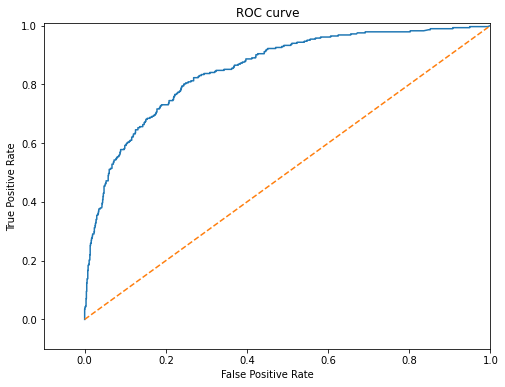

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

* As expected, the Random Forest Model, which produced the highest F1 score also resulted in the highest auc_roc score (0.85), which is better than random.

# Comparing Random Forest Model Quality Before and After Imbalance Fixing and Finding Optimal Hyperparameters

In [37]:
model = RandomForestClassifier(random_state=12345) 
model.fit(features_train, target_train) # train model on training set
predictions_valid = model.predict(features_valid)
predictions_test=model.predict(features_test)
result = f1_score(target_test, predictions_test)

In [38]:
cf_matrix = confusion_matrix(target_test, predictions_test)

# Before 

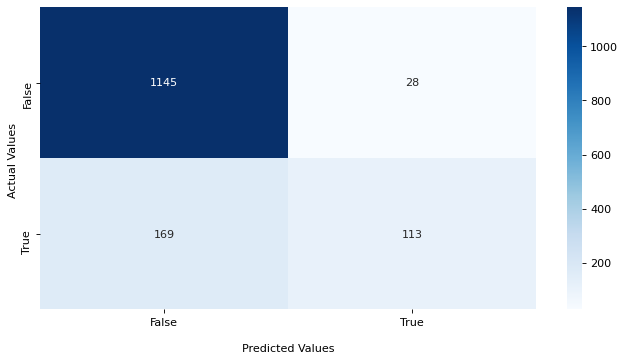

In [39]:
plt.figure(figsize=(10, 5), dpi=80)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [40]:
model = RandomForestClassifier(random_state=12345, n_estimators=90, max_depth=16)
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)
predictions_test=model.predict(features_test)
print(f1_score(target_test, predictions_test))

0.5912408759124088


# After

In [41]:
cf_matrix = confusion_matrix(target_test, predictions_test)

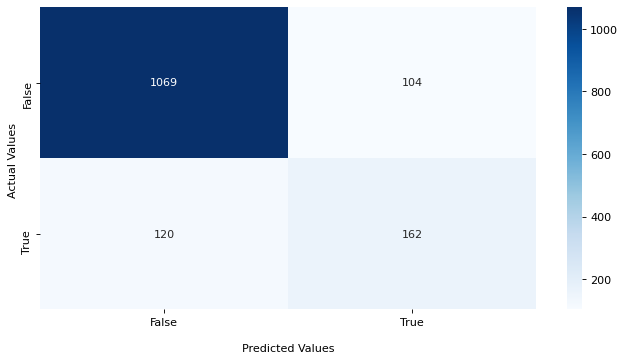

In [42]:
plt.figure(figsize=(10, 5), dpi=80)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

* As we can see through the two confusion matrices, the model predicts more true positive instances and less false negatives. In other words, the upsampled model now overcompansates predicting customers who are likely to leave the bank which is good in this case as the bank would like to cut costs by not acquiring new customers that will likely leave soon.


* In addition, the improved model more accurately predicts customers who have left as "exited" customers.

# Conclusion

* After trying different models and determining the best hyperparameters for each model, the best model with the highest F1 score(.591) was the Random Forest model (n_est=90, max_depth=16). 


* This model produced an auc_roc score of .851, which is fairly above average and indicates performance that would be generally better than random selection. 